In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe(include = "all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## rename race/ethnicity to ethnicity

In [7]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)

In [8]:
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## remove spaces in column names

In [9]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## clean null values if present

In [10]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df=df.dropna()
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## explore unique values in catagorical columns

In [12]:
df[["gender","ethnicity","parental_level_of_education","lunch","test_preparation_course"]].apply(pd.Series.unique)

gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

In [13]:
print(df["gender"].unique())
print(df["ethnicity"].unique())
print(df["parental_level_of_education"].unique())
print(df["lunch"].unique())
print(df["test_preparation_course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


## fix dtypes of the columns if needed

In [14]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

## replace 'none' to 'not completed' in test preration cource

In [15]:
df["test_preparation_course"]=df["test_preparation_course"].replace("none","not completed")
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## check duplicate rows

In [16]:
print(df.duplicated().sum())

0


In [17]:
df['total_marks'] = df.apply(lambda x: x['math_score'] + x['reading_score'] + x['writing_score'], axis = 1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


In [18]:
df['total_marks'] = df[['math_score','reading_score','writing_score']].sum(axis = 1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


In [19]:
df['division'] = df['total_marks'].apply(lambda x: 'First Division' if x >= 180 else 'Second Division' if x >= 150 else 'Third Division' if x >= 90 else 'Fail')

In [20]:
df.division.value_counts()

First Division     715
Second Division    182
Third Division      94
Fail                 9
Name: division, dtype: int64

In [21]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division


## Average marks of a student in all 3 subjects.

In [22]:
df["total_marks"].mean()

203.312

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_marks, dtype: float64


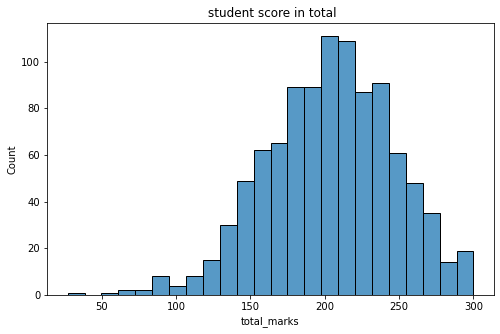

In [23]:
print(df.total_marks.describe())
plt.figure(figsize=(8,5))
sns.histplot(df.total_marks)
plt.title(' student score in total')
plt.show()

## Which student got the highest marks in total?

In [24]:
print(df.loc[df["total_marks"].idxmax()])

gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course            not completed
math_score                                   100
reading_score                                100
writing_score                                100
total_marks                                  300
division                          First Division
Name: 458, dtype: object


In [25]:
df.sort_values('total_marks', ascending=False).head(5)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,First Division
458,female,group E,bachelor's degree,standard,not completed,100,100,100,300,First Division
962,female,group E,associate's degree,standard,not completed,100,100,100,300,First Division
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,First Division
179,female,group D,some high school,standard,completed,97,100,100,297,First Division


## which student got the lowest marks in total?

In [26]:
print(df.loc[df["total_marks"].idxmin()])

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course           not completed
math_score                                    0
reading_score                                17
writing_score                                10
total_marks                                  27
division                                   Fail
Name: 59, dtype: object


In [27]:
df.sort_values('total_marks', ascending=True).head(5)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
59,female,group C,some high school,free/reduced,not completed,0,17,10,27,Fail
980,female,group B,high school,free/reduced,not completed,8,24,23,55,Fail
596,male,group B,high school,free/reduced,not completed,30,24,15,69,Fail
327,male,group A,some college,free/reduced,not completed,28,23,19,70,Fail
76,male,group E,some high school,standard,not completed,30,26,22,78,Fail


## What is the average score of students in each subjects? hint: #make box plot of each subject

Text(0.5, 1.0, 'Writing_score')

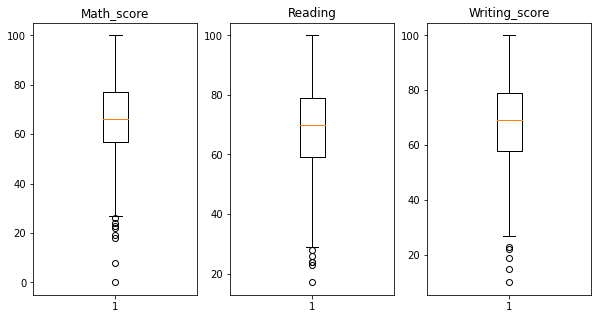

In [31]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.boxplot(df.math_score)
plt.title('Math_score')

plt.subplot(1,3,2)
plt.boxplot(df.reading_score)
plt.title('Reading')


plt.subplot(1,3,3)
plt.boxplot(df.writing_score)
plt.title('Writing_score')

## Ratio of Male and Female students. hint: #pie chart

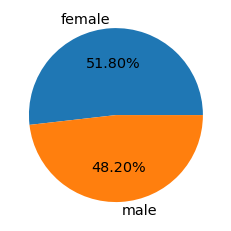

In [34]:
a=df.gender.value_counts()
a
plt.pie(x=a,labels = a.index,autopct='%0.2f%%',textprops = {'size': 'x-large'})
plt.show()

## Ratio of ethnicity of students. hint: # pie chart

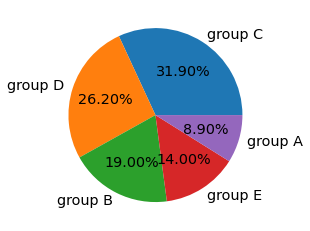

In [42]:
a=df.ethnicity .value_counts()
a
plt.pie(x=a,labels = a.index,autopct='%0.2f%%',textprops = {'size': 'x-large'})
plt.show()

##  On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [44]:
pivot_table = df.pivot_table(index="ethnicity", columns="gender", values="total_marks", aggfunc="mean")
pivot_table

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


## Which gender perfomed better overall? hint: #bar plot

<AxesSubplot:xlabel='gender', ylabel='total_marks'>

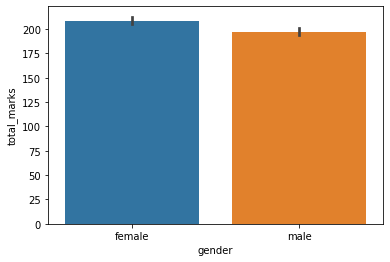

In [45]:
sns.barplot(data =df,x='gender',y='total_marks')

## Which gender performed better in each group? hint: #bar

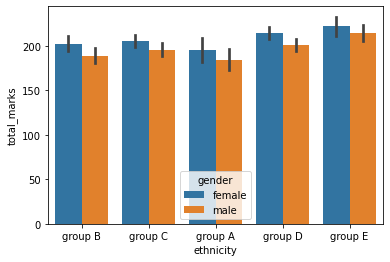

In [49]:
sns.barplot(data =df,x='ethnicity',y='total_marks',hue='gender')
plt.show()

## How many students have failed and which group have the most?

In [50]:
k= df[df.division == 'Fail']
k.ethnicity.value_counts()

group B    5
group C    2
group E    1
group A    1
Name: ethnicity, dtype: int64

## students got more marks than others whose parents have higer education degree?

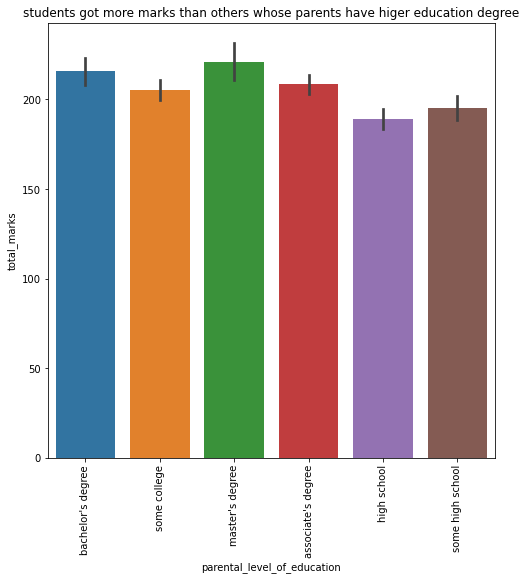

In [56]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.barplot(data =df,x='parental_level_of_education',y='total_marks')
plt.title("students got more marks than others whose parents have higer education degree")
plt.show()

## Those students whose completed their course got more grades in compare to those student who didn't?

In [57]:
l=df.test_preparation_course.value_counts()
l

not completed    642
completed        358
Name: test_preparation_course, dtype: int64

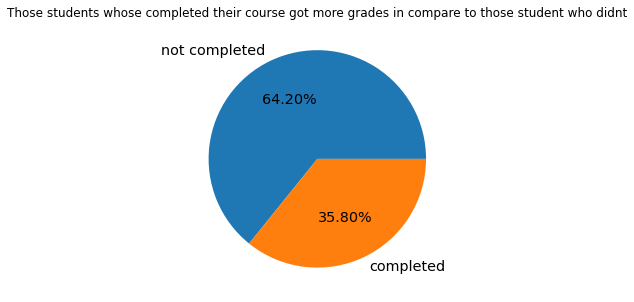

In [58]:
plt.figure(figsize=(5,5))
plt.pie(x = l,labels = l.index,autopct='%0.2f%%', textprops={'size': 'x-large'})
plt.title('Those students whose completed their course got more grades in compare to those student who didnt')
plt.show()